In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import tools.clusterfit as cf
plt.style.use('nice.mplstyle')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


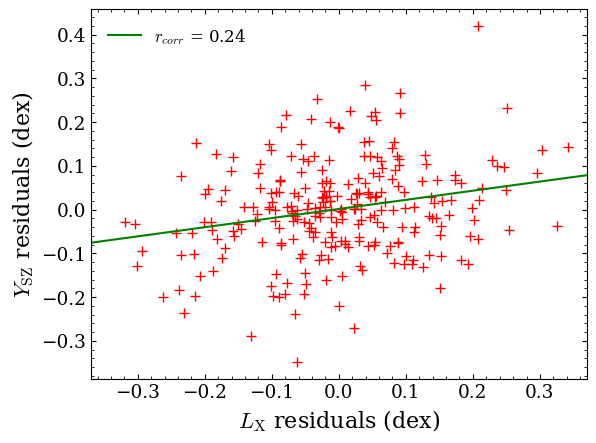

In [7]:
samples = pd.read_csv('./data/samples-lightcone0-clean.csv')

# LX-T best fit
logT_ = np.log10(samples[cf.COLUMNS['T']]/3.8)
logLX = np.log10(samples[cf.COLUMNS['LX']]/1e44 * cf.E(samples['ObservedRedshift'])**-1)
res1 = (logLX - (0.18 + 2.494*logT_) )

# YSZ-T best fit
logT_ = np.log10(samples[cf.COLUMNS['T']]/3.2)
logYSZ = np.log10(samples[cf.COLUMNS['YSZ']]/20 * cf.E(samples['ObservedRedshift'])**1)
res2 = (logYSZ - (0.0330 + 2.756*logT_))

plt.scatter(res1[:260], res2[:260], marker='+', color='r', s=50, linewidths=1)

# fit a line
m, b = np.polyfit(res1[:260], res2[:260], 1)
x = np.linspace(-0.4, 0.4, 100)
plt.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(res1[:260], res2[:260])[0,1]))
plt.xlim(-0.37, 0.37)

plt.legend()
plt.xlabel('$L_\\mathrm{X}$ residuals (dex)')
plt.ylabel('$Y_\\mathrm{SZ}$ residuals (dex)')
plt.show()

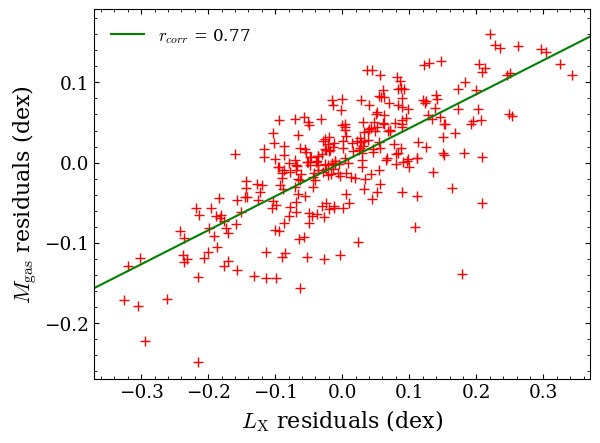

In [6]:
samples = pd.read_csv('./data/samples-lightcone0-clean.csv')

# LX-T best fit
logT_ = np.log10(samples[cf.COLUMNS['T']]/3.8)
logLX = np.log10(samples[cf.COLUMNS['LX']]/1e44 * cf.E(samples['ObservedRedshift'])**-1)
res1 = (logLX - (0.18 + 2.494*logT_))

# M-T best fit
logT_ = np.log10(samples[cf.COLUMNS['T']]/3.6)
logM = np.log10(samples[cf.COLUMNS['M']]/3e13 * cf.E(samples['ObservedRedshift'])**1)
res2 = (logM - (0.029 + 2.004*logT_))

plt.scatter(res1[:300], res2[:300], marker='+', color='r', s=50, linewidths=1)

# fit a line
m, b = np.polyfit(res1[:300], res2[:300], 1)
x = np.linspace(-0.4, 0.4, 100)
plt.plot(x, m*x + b, color='g', label='$r_{{corr}}$ = {:.2f}'.format(np.corrcoef(res1[:260], res2[:260])[0,1]))
plt.xlim(-0.37, 0.37)

plt.legend()
plt.xlabel('$L_\\mathrm{X}$ residuals (dex)')
plt.ylabel('$M_\\mathrm{gas}$ residuals (dex)')
plt.show()